In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [6]:
df=pd.read_csv('diabetes.csv')
print(df)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

In [7]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
df.shape


(768, 9)

In [9]:
df.size

6912

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [11]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [12]:
df.sample(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
761,9,170,74,31,0,44.0,0.403,43,1
143,10,108,66,0,0,32.4,0.272,42,1
292,2,128,78,37,182,43.3,1.224,31,1
391,5,166,76,0,0,45.7,0.340,27,1
439,6,107,88,0,0,36.8,0.727,31,0
466,0,74,52,10,36,27.8,0.269,22,0
266,0,138,0,0,0,36.3,0.933,25,1
616,6,117,96,0,0,28.7,0.157,30,0
752,3,108,62,24,0,26.0,0.223,25,0
54,7,150,66,42,342,34.7,0.718,42,0


In [13]:
df.Pregnancies.value_counts()

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64

In [14]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


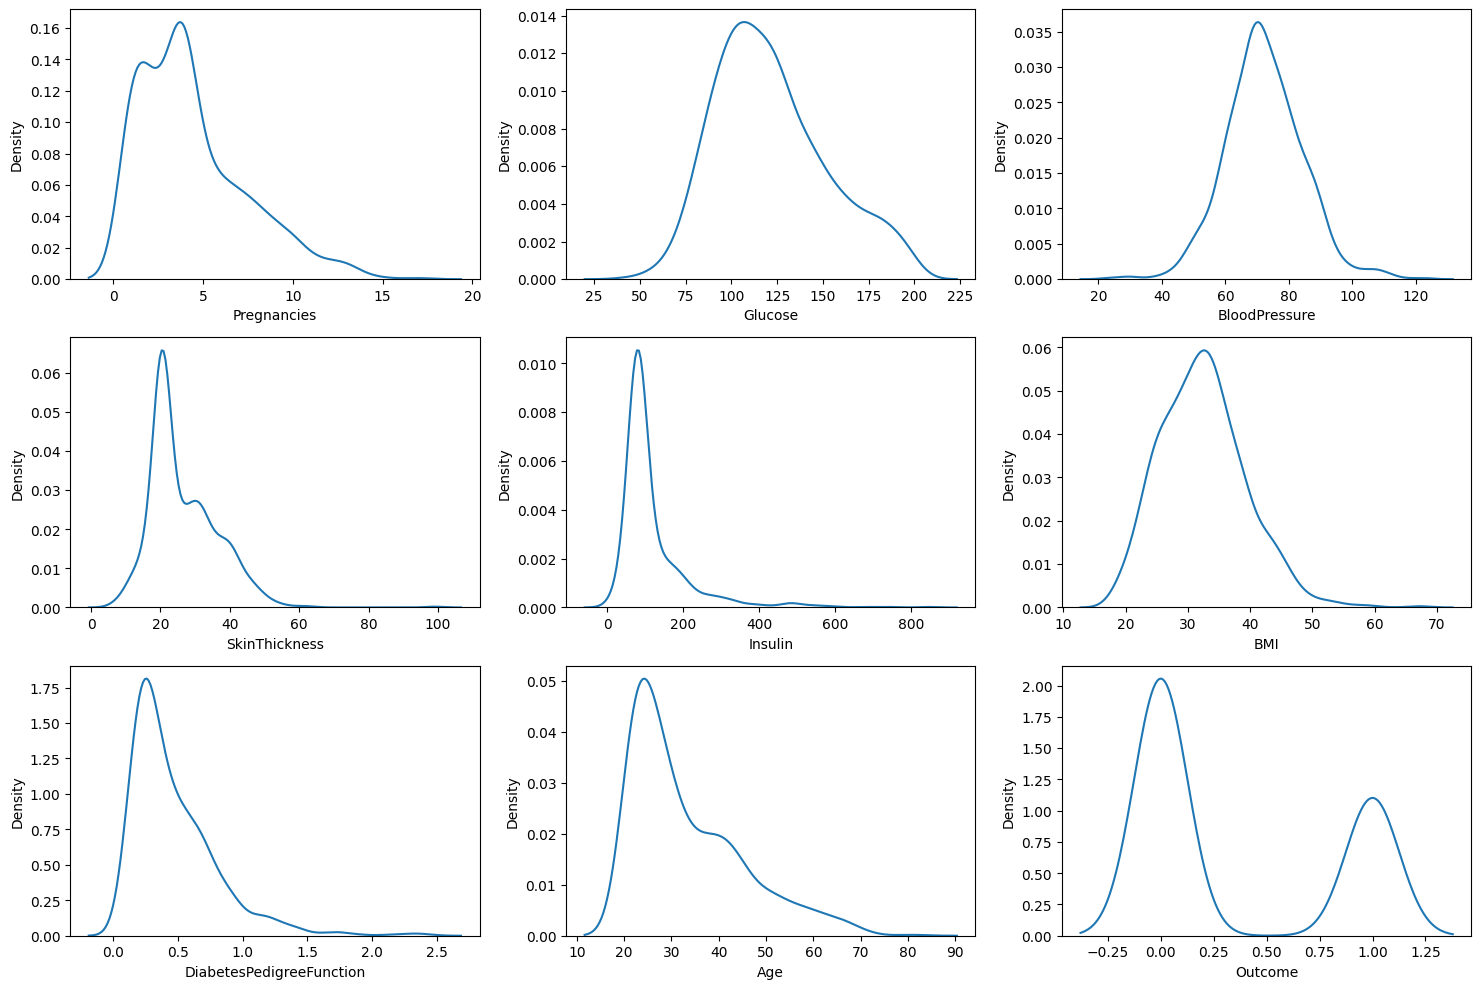

In [38]:
int_vars=df

fig,axs=plt.subplots(nrows=3,ncols=3,figsize=(15,10))
axs=axs.flatten()
for i, var in enumerate(int_vars):
    sns.kdeplot(x=var,data=df,ax=axs[i])
    
plt.tight_layout()
plt.show()


In [15]:
df=df.drop_duplicates()

In [16]:
df.shape

(768, 9)

In [17]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [18]:
df.Pregnancies.value_counts()[0]

111

In [19]:
df.Glucose.value_counts()[0]

5

In [20]:
df.BloodPressure.value_counts()[0]

35

In [22]:
df.SkinThickness.value_counts()[0]

227

In [23]:
df.Insulin.value_counts()[0]

374

In [24]:
df.BMI.value_counts()[0]

11

In [34]:
df['Pregnancies']=df['Pregnancies'].replace(0,df['Pregnancies'].mean())
df['Glucose']=df['Glucose'].replace(0,df['Glucose'].mean())
df['BloodPressure']=df['BloodPressure'].replace(0,df['BloodPressure'].mean())
df['SkinThickness']=df['SkinThickness'].replace(0,df['SkinThickness'].mean())
df['Insulin']=df['Insulin'].replace(0,df['Insulin'].mean())


In [35]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [36]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,4.400782,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,2.984162,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,1.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,2.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.845052,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


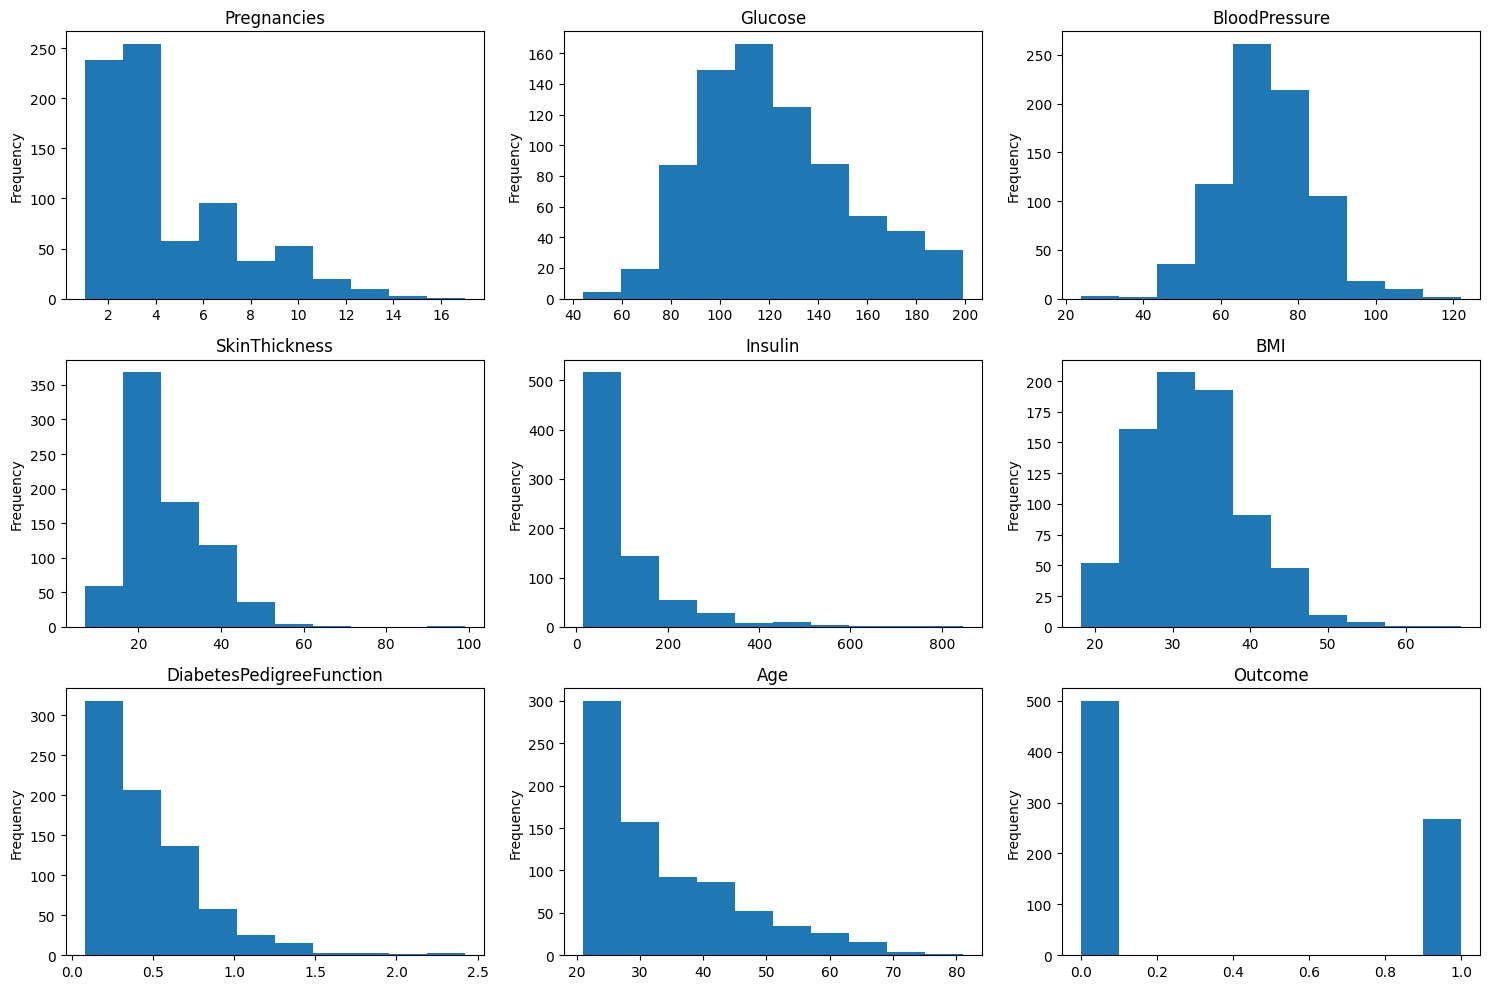

In [39]:
int_vars=df

fig,axs=plt.subplots(nrows=3,ncols=3,figsize=(15,10))
axs=axs.flatten()
for i, var in enumerate(int_vars):
    df[var].plot(kind='hist',ax=axs[i])
    axs[i].set_title(var)
   
plt.tight_layout()
plt.show()


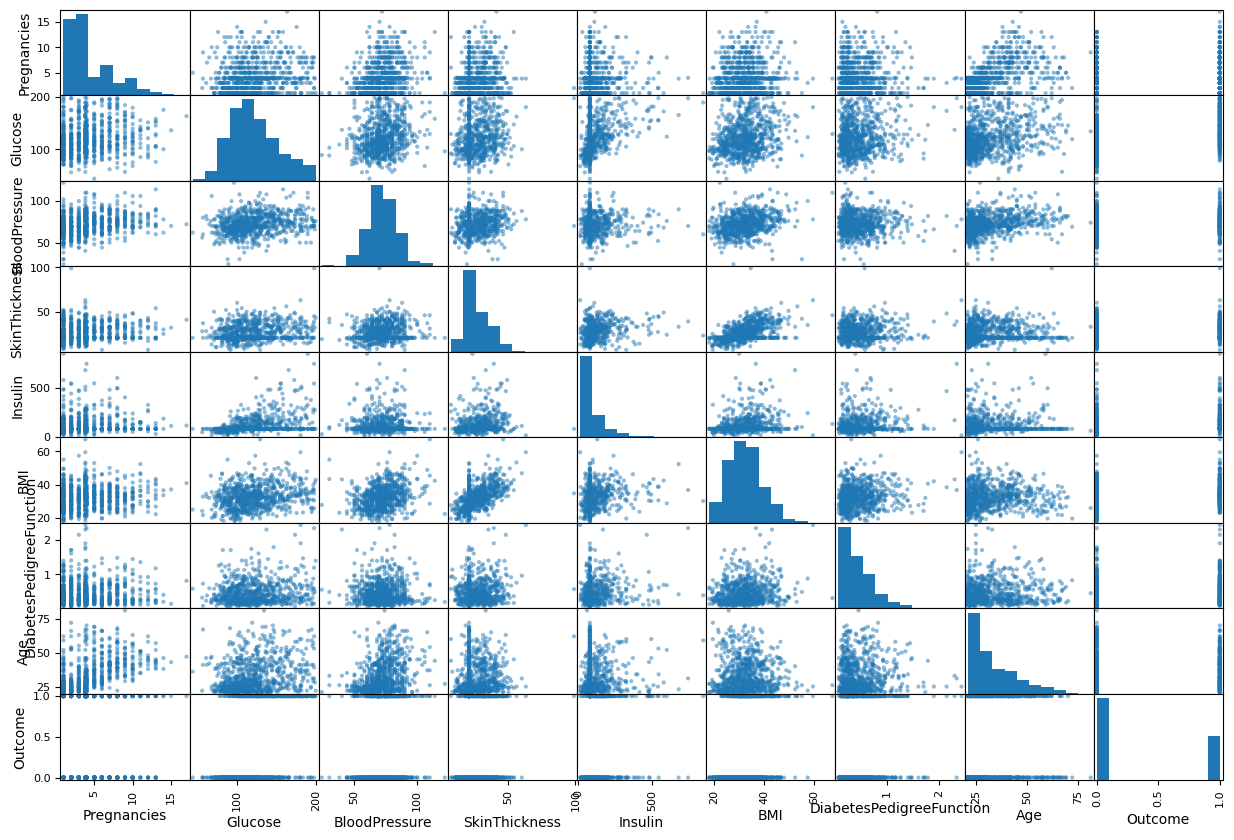

In [43]:
from pandas.plotting import scatter_matrix
scatter_matrix(df, figsize=(15,10))
plt.show()

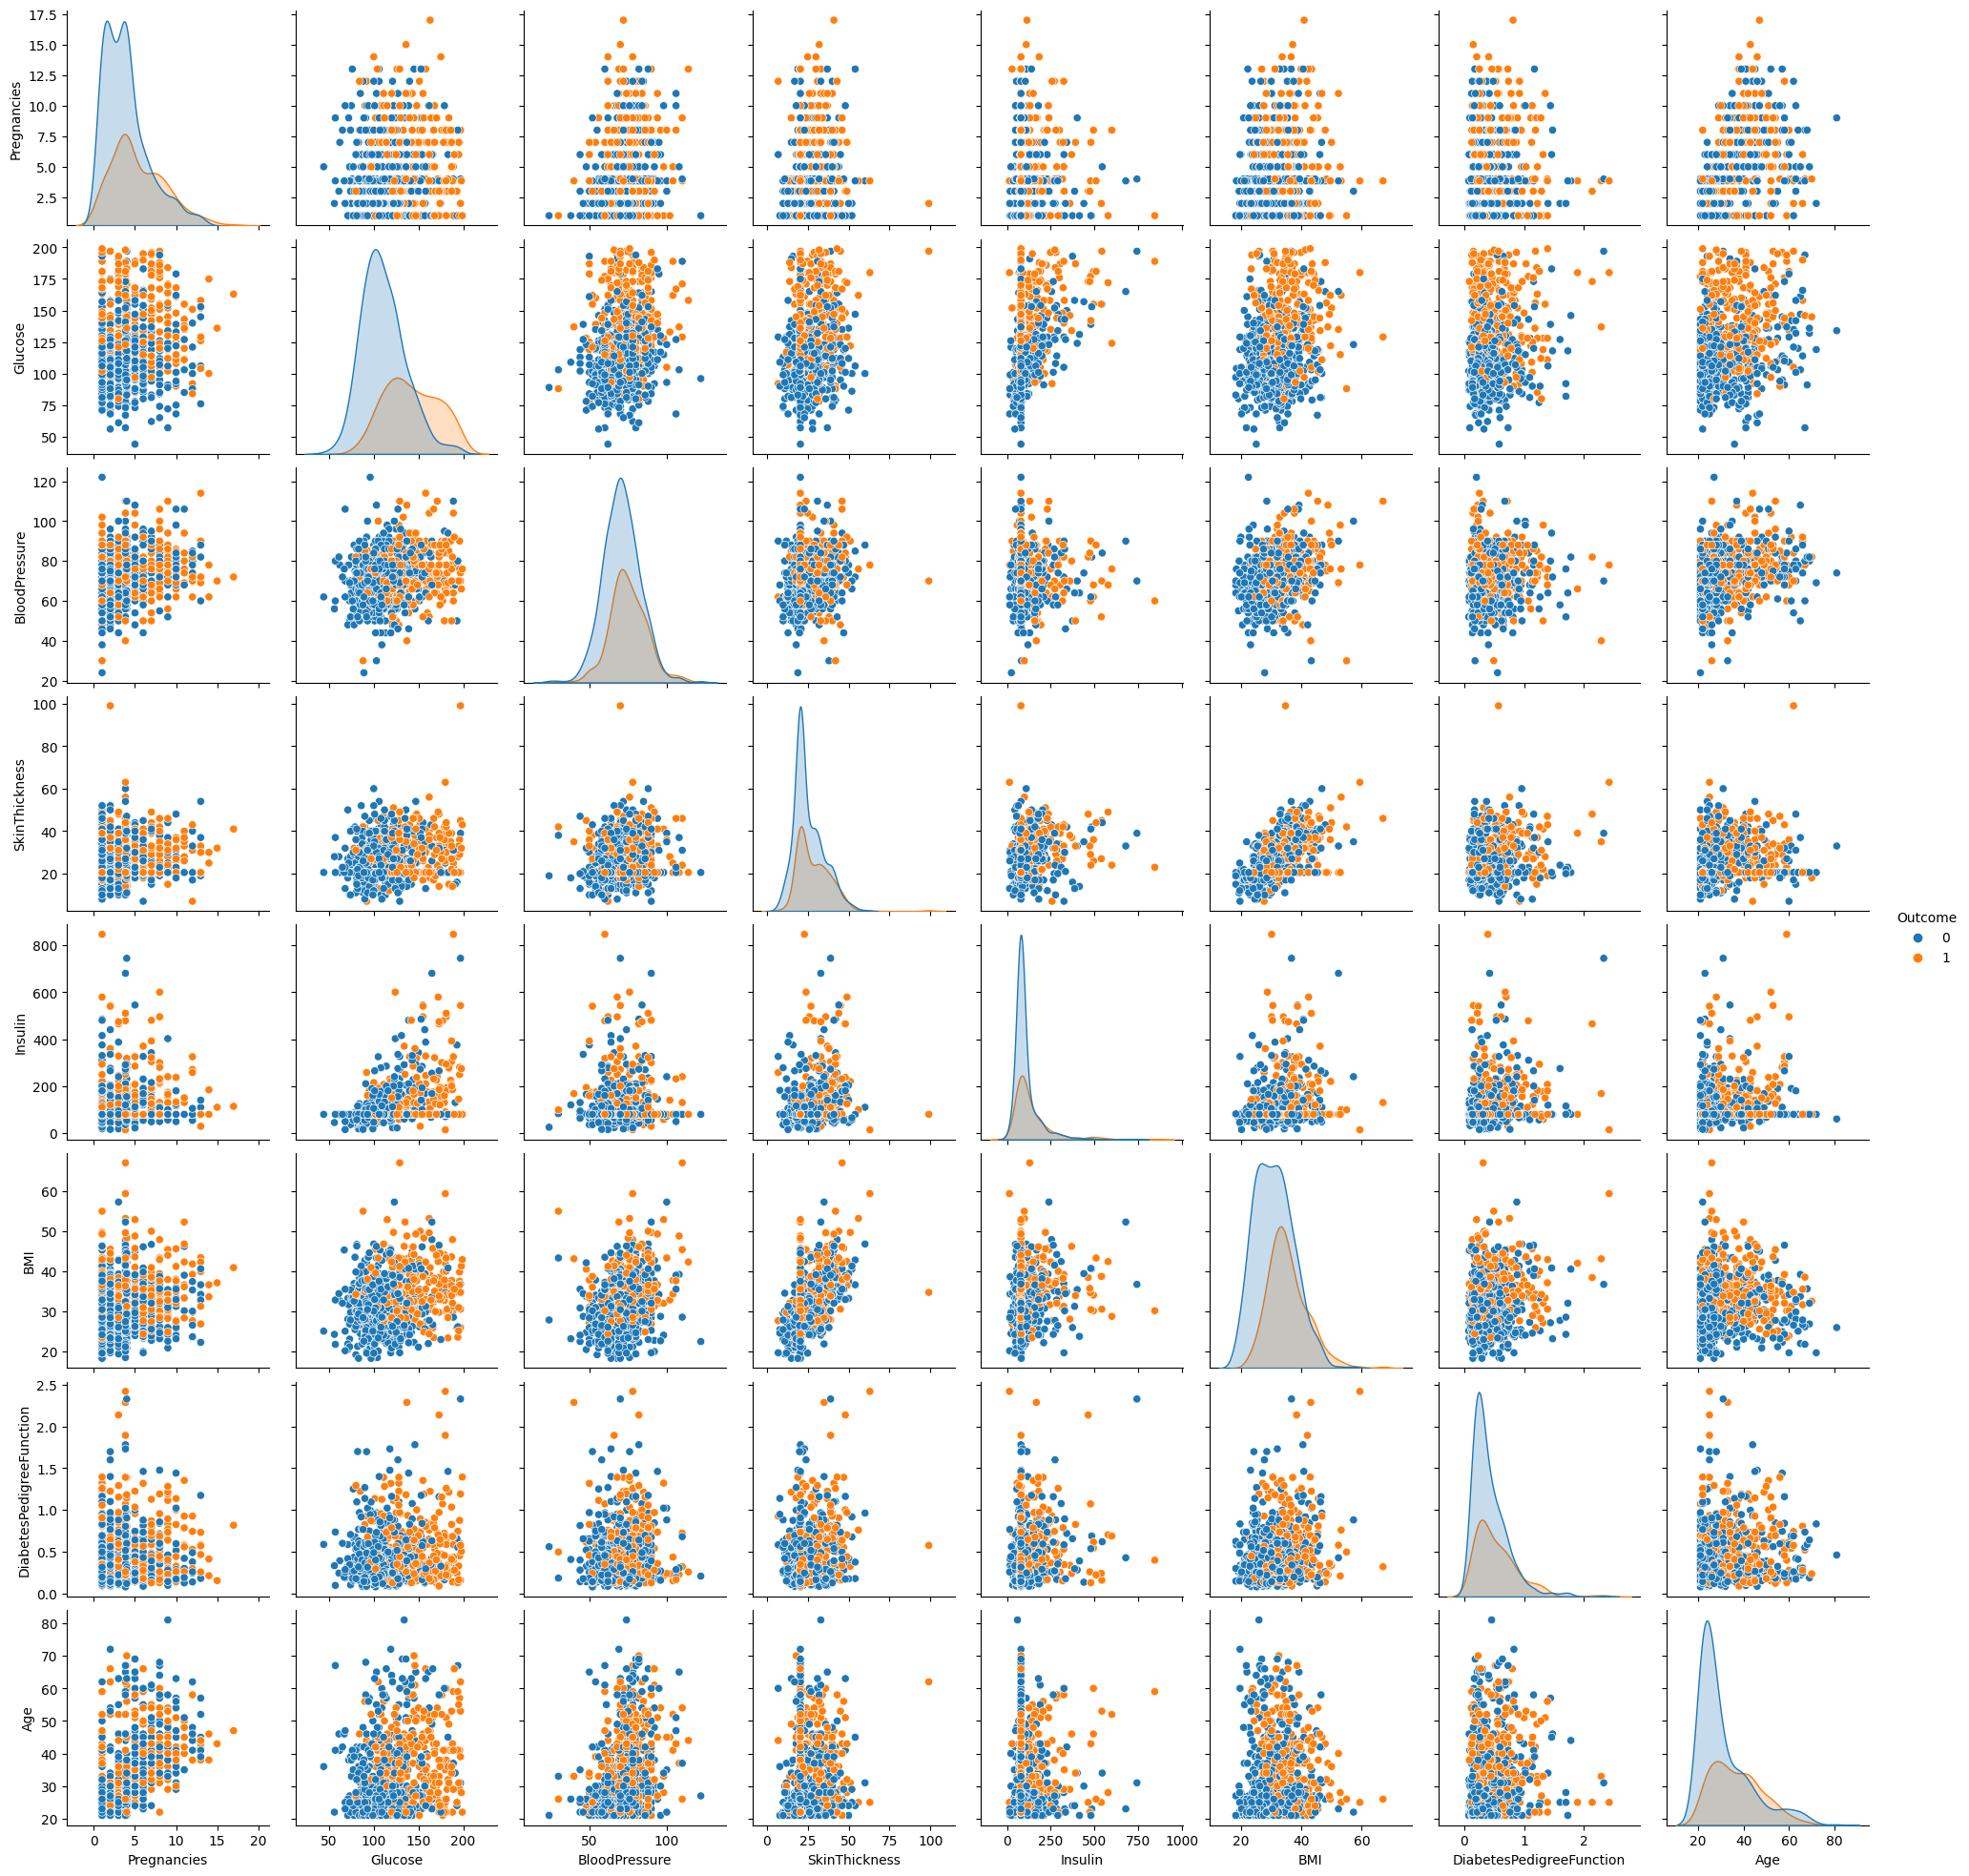

In [44]:
sns.pairplot(data=df, hue='Outcome')
plt.show()

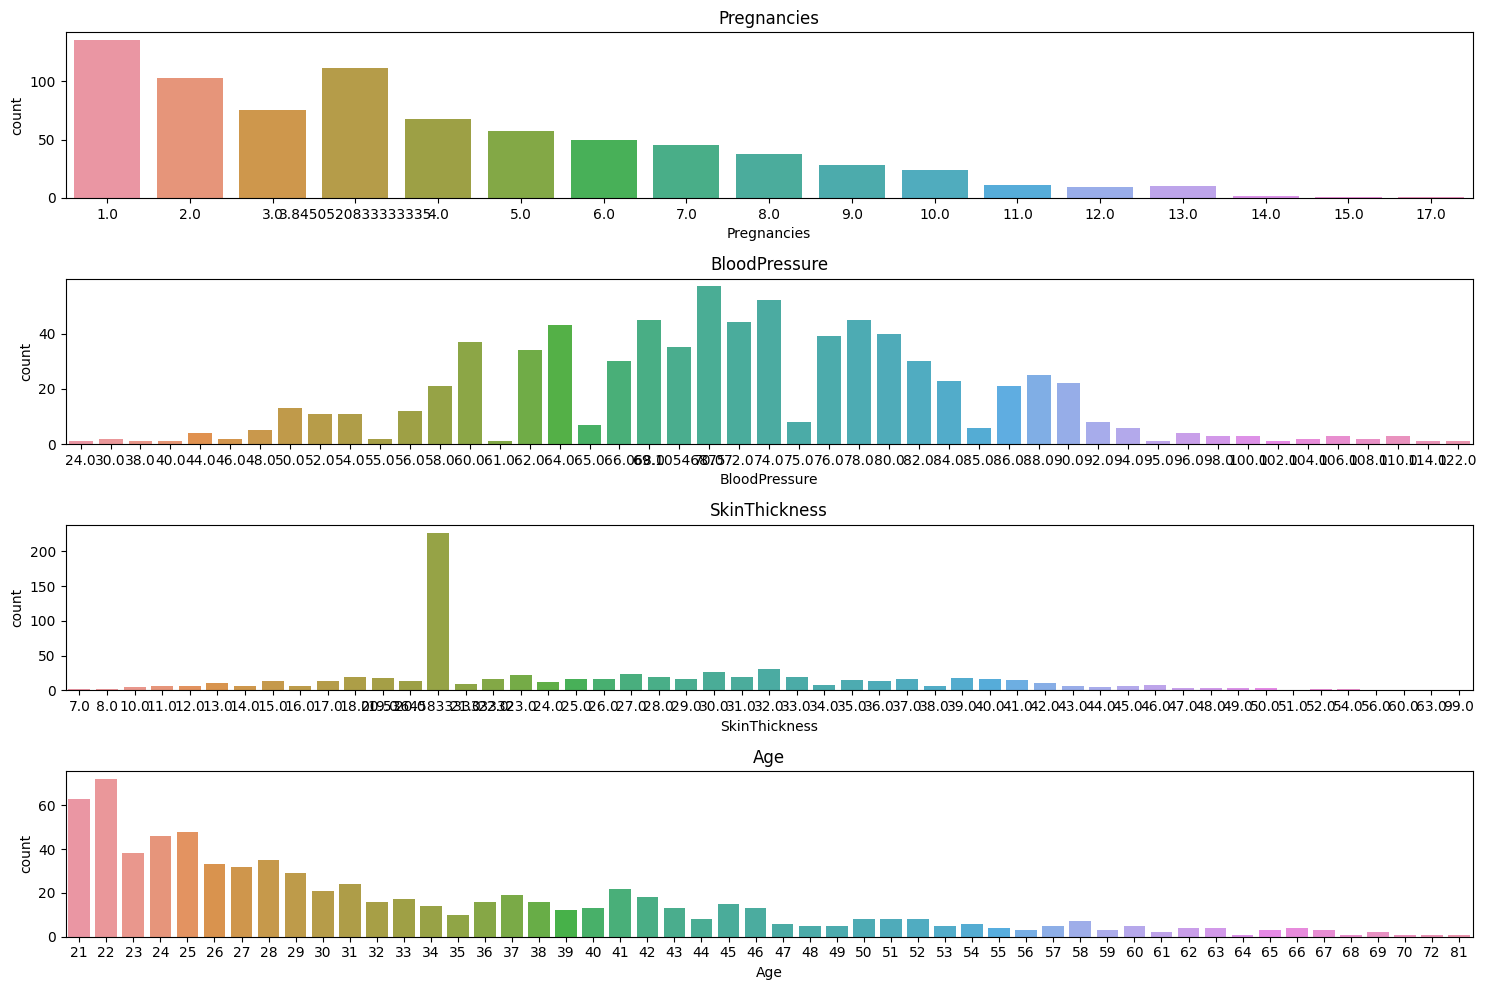

In [46]:
int_vars=['Pregnancies','BloodPressure','SkinThickness','Age']

fig,axs=plt.subplots(nrows=4,ncols=1,figsize=(15,10))
axs=axs.flatten()
for i, var in enumerate(int_vars):
    sns.countplot(x=var,data=df,ax=axs[i])
    axs[i].set_title(var)
   
plt.tight_layout()
plt.show()


In [45]:
# Analyzing relations between variables

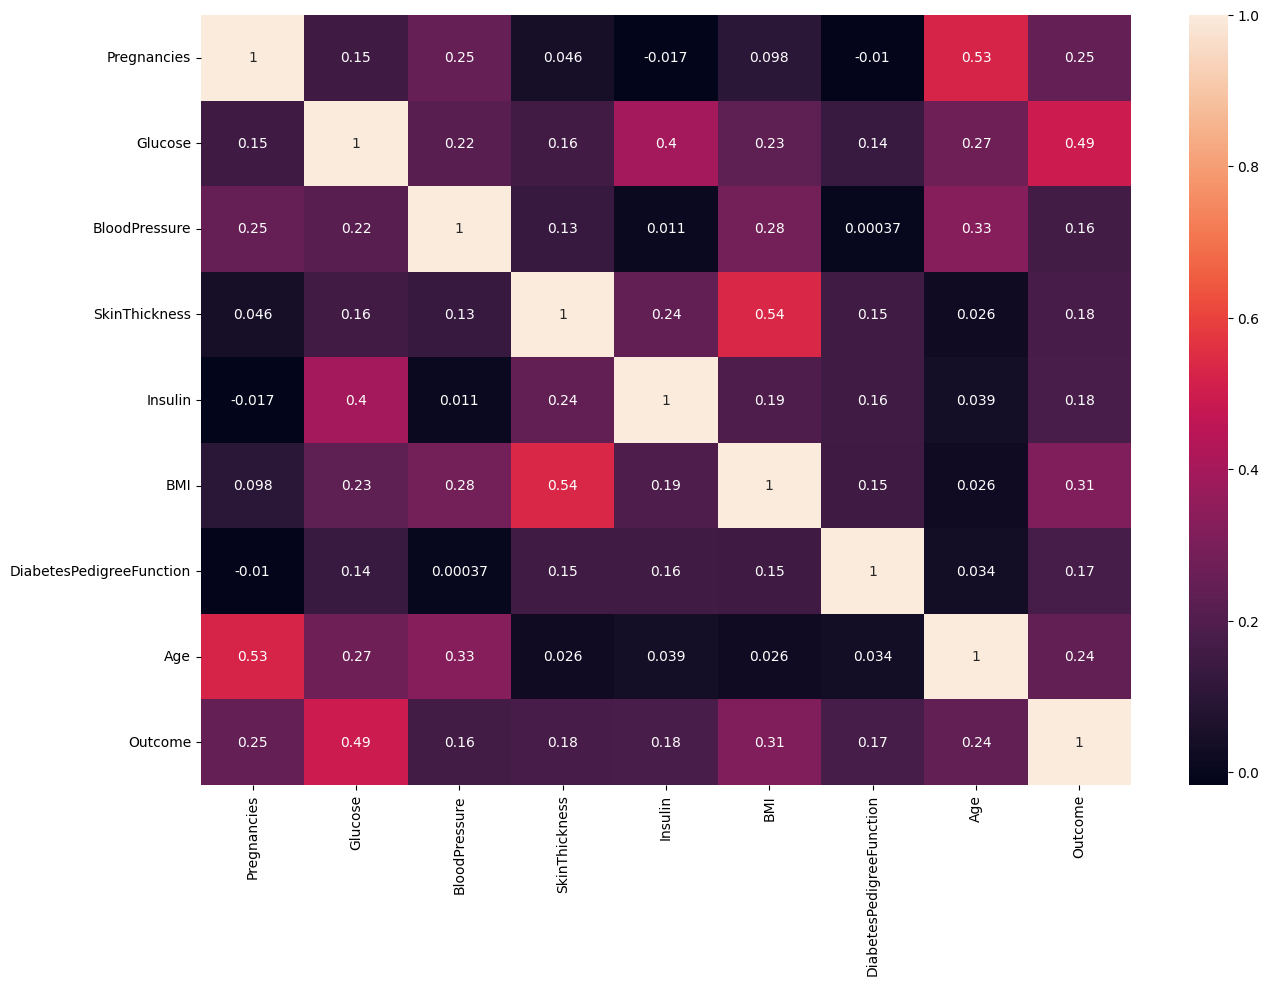

In [47]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),fmt='.2g',annot=True)
plt.show()

In [48]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [51]:
outlier_col=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']

In [54]:
def remove_outlier_iqr(data):
    Q1=np.percentile(data,25)
    Q3=np.percentile(data,75)
    
    IQR=Q3-Q1
    
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    
    print(len(data))
    
    for i in range(len(data)):
        if data[i]>upper_bound:
            data[i]=upper_bound
        elif data[i]<lower_bound:
            data[i]=lower_bound
        else:
            pass
        
    return data

    
    

In [55]:
for col in outlier_col:
    print(col)
    df[col]=remove_outlier_iqr(df[col])
    

Pregnancies
768


c:\users\bijin\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\bijin\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Glucose
768
BloodPressure
768
SkinThickness
768
Insulin
768
BMI
768
DiabetesPedigreeFunction
768
Age
768


In [56]:
target_name='Outcome'
y=df[target_name]
x=df.drop(target_name,axis=1)

In [57]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.000000,148.0,72.0,35.000000,79.799479,33.6,0.627,50
1,1.000000,85.0,66.0,29.000000,79.799479,26.6,0.351,31
2,8.000000,183.0,64.0,20.536458,79.799479,23.3,0.672,32
3,1.000000,89.0,66.0,23.000000,94.000000,28.1,0.167,21
4,3.845052,137.0,40.0,35.000000,168.000000,43.1,1.200,33


In [58]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [59]:
scaler=StandardScaler()
scaler.fit(x)
SSX=scaler.transform(x)

In [64]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(SSX,y,test_size=0.2,random_state=7)


In [65]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)


KNeighborsClassifier()

In [69]:
x_test.shape

(154, 8)

In [72]:
knn_pred=knn.predict(x_test)
knn_pred.shape

(154,)

In [66]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train,y_train)


GaussianNB()

In [73]:
nb_pred=nb.predict(x_test)
nb_pred.shape

(154,)

In [67]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)


DecisionTreeClassifier()

In [74]:
dt_pred=dt.predict(x_test)
dt_pred.shape

(154,)

In [68]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(criterion='entropy')
rf.fit(x_train,y_train)


RandomForestClassifier(criterion='entropy')

In [75]:
rf_pred=rf.predict(x_test)
rf_pred.shape

(154,)

In [102]:
# MODEL EVALUTION

from sklearn.metrics import accuracy_score

#KNN
print(knn.score(x_train,y_train)*100)
print(knn.score(x_test,y_test)*100)
accuracy_score(y_test,knn_pred)*100


81.43322475570032
75.97402597402598


75.97402597402598

In [78]:
from sklearn.metrics import mean_absolute_error

y_preds=knn.predict(x_test)
mae=mean_absolute_error(y_test,y_preds)
mae


0.24025974025974026

In [79]:
from sklearn.metrics import mean_squared_error

y_preds=knn.predict(x_test)
mse=mean_squared_error(y_test,y_preds)
mse


0.24025974025974026

In [82]:
from sklearn.metrics import mean_squared_error
import math

y_preds=knn.predict(x_test)
mse=mean_squared_error(y_test,y_preds)
rmse=math.sqrt(mse)
rmse


0.4901629731627434

In [103]:
# NAVIE BAYES
print(nb.score(x_train,y_train)*100)
print(nb.score(x_test,y_test)*100)
print(accuracy_score(y_test,nb_pred)*100)


76.2214983713355
75.97402597402598
75.97402597402598


In [83]:


from sklearn.metrics import mean_absolute_error

y_preds=nb.predict(x_test)
mae=mean_absolute_error(y_test,y_preds)
mae


0.24025974025974026

In [84]:
from sklearn.metrics import mean_squared_error

y_preds=nb.predict(x_test)
mse=mean_squared_error(y_test,y_preds)
mse

0.24025974025974026

In [85]:
from sklearn.metrics import mean_squared_error
import math

y_preds=nb.predict(x_test)
mse=mean_squared_error(y_test,y_preds)
rmse=math.sqrt(mse)
rmse

0.4901629731627434

In [107]:
# DECISION TREE

print(dt.score(x_train,y_train)*100)
print(dt.score(x_test,y_test)*100)
accuracy_score(y_test,dt_pred)*100


100.0
79.22077922077922


79.22077922077922

In [86]:


from sklearn.metrics import mean_absolute_error

y_preds=dt.predict(x_test)
mae=mean_absolute_error(y_test,y_preds)
mae


0.2077922077922078

In [87]:
from sklearn.metrics import mean_squared_error

y_preds=dt.predict(x_test)
mse=mean_squared_error(y_test,y_preds)
mse

0.2077922077922078

In [88]:
from sklearn.metrics import mean_squared_error
import math

y_preds=dt.predict(x_test)
mse=mean_squared_error(y_test,y_preds)
rmse=math.sqrt(mse)
rmse

0.4558423058385518

In [101]:
#RANDOM FOREST
print(rf.score(x_train,y_train)*100)
print(rf.score(x_test,y_test)*100)
accuracy_score(y_test,rf_pred)*100

100.0
77.27272727272727


77.27272727272727

In [89]:


from sklearn.metrics import mean_absolute_error

y_preds=rf.predict(x_test)
mae=mean_absolute_error(y_test,y_preds)
mae

0.22727272727272727

In [90]:
from sklearn.metrics import mean_squared_error

y_preds=rf.predict(x_test)
mse=mean_squared_error(y_test,y_preds)
mse

0.22727272727272727

In [91]:
from sklearn.metrics import mean_squared_error
import math

y_preds=rf.predict(x_test)
mse=mean_squared_error(y_test,y_preds)
rmse=math.sqrt(mse)
rmse

0.4767312946227962

In [108]:
from sklearn.metrics import classification_report,confusion_matrix
cm=confusion_matrix(y_test,knn_pred)
cm

array([[83, 14],
       [23, 34]], dtype=int64)

<AxesSubplot:>

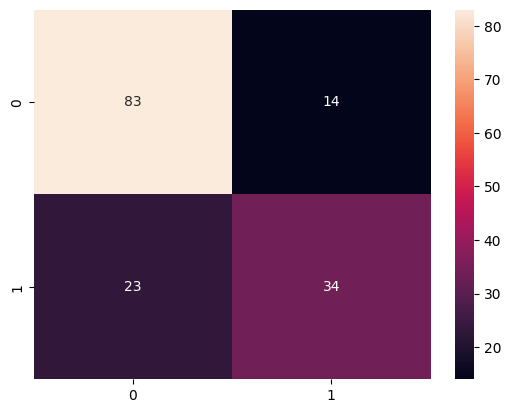

In [109]:
sns.heatmap(confusion_matrix(y_test,knn_pred),annot=True,fmt="d")

In [111]:
TP=cm[0,0]
FP=cm[0,1]
FN=cm[1,0]
TN=cm[1,1]
TP,FP,FN,TN


(83, 14, 23, 34)

In [113]:
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve
cm=confusion_matrix(y_test,knn_pred)


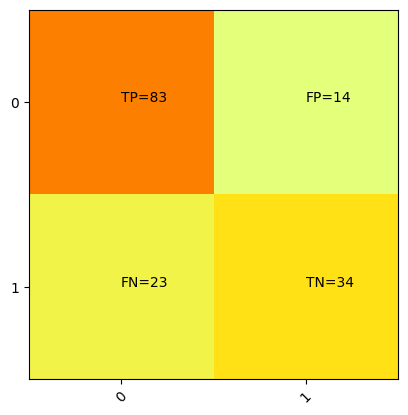

In [114]:
import matplotlib.pyplot as plt
plt.clf()
plt.imshow(cm,interpolation='nearest', cmap=plt.cm.Wistia)
classNames=['0','1']
tick_marks=np.arange(len(classNames))
plt.xticks(tick_marks,classNames,rotation=45)
plt.yticks(tick_marks,classNames)
s=[['TP','FP'],['FN','TN']]
for i in range(2):
    for j in range(2):
        plt.text(j,i,str(s[i][j])+"="+str(cm[i][j]))
plt.show()


In [115]:
pd.crosstab(y_test,knn_pred,margins=False)


col_0,0,1
Outcome,,
0,83,14
1,23,34


In [116]:
pd.crosstab(y_test,knn_pred,margins=True)


col_0,0,1,All
Outcome,,,
0,83,14,97
1,23,34,57
All,106,48,154


In [118]:
pd.crosstab(y_test,knn_pred,rownames=['Actual values'],colnames=['Predicted values'],margins=True)


Predicted values,0,1,All
Actual values,,,
0,83,14,97
1,23,34,57
All,106,48,154


In [119]:
#PRECISION

TP,FP


(83, 14)

In [120]:
Presicion=TP/(TP+FP)
Presicion


0.8556701030927835

In [124]:
presicion_score=TP/float(TP+FP)*100
print('Presicion Score:{0:0.4f}'.format(presicion_score))


Presicion Score:85.5670


In [123]:
from sklearn.metrics import classification_report
classification_report(y_test,knn_pred,digits=4)


'              precision    recall  f1-score   support\n\n           0     0.7830    0.8557    0.8177        97\n           1     0.7083    0.5965    0.6476        57\n\n    accuracy                         0.7597       154\n   macro avg     0.7457    0.7261    0.7327       154\nweighted avg     0.7554    0.7597    0.7548       154\n'

In [125]:
#recall

recall_score=TP/float(TP+FN)*100
recall_score


78.30188679245283

In [126]:
TP,FN

(83, 23)

In [128]:
from sklearn.metrics import recall_score
recall_score(y_test,knn_pred)*100


59.64912280701754

In [129]:
auc=roc_auc_score(y_test,knn_pred)
auc


0.7260806655814795

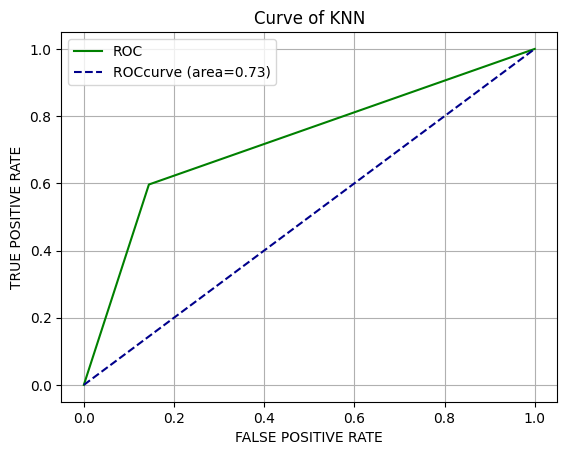

In [130]:
fpr,tpr,thresholds=roc_curve(y_test,knn_pred)
plt.plot(fpr,tpr,color='green',label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='ROCcurve (area=%0.2f)'%auc)
plt.xlabel('FALSE POSITIVE RATE')
plt.ylabel('TRUE POSITIVE RATE')
plt.title('Curve of KNN')
plt.legend()
plt.grid()
plt.show()


<AxesSubplot:>

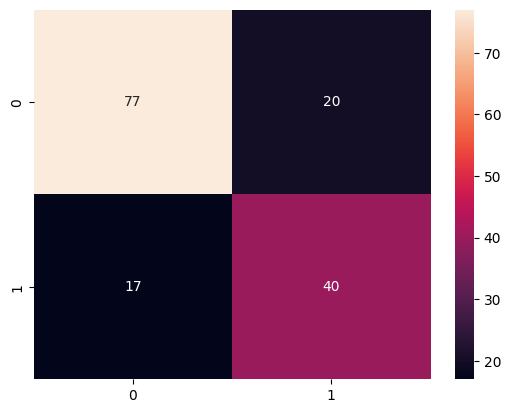

In [131]:
#Navie bayes

sns.heatmap(confusion_matrix(y_test,nb_pred),annot=True,fmt="d")


In [132]:
from sklearn.metrics import recall_score
recall_score(y_test,nb_pred)*100


70.17543859649122

In [133]:
auc=roc_auc_score(y_test,nb_pred)
auc

0.7477844094773015

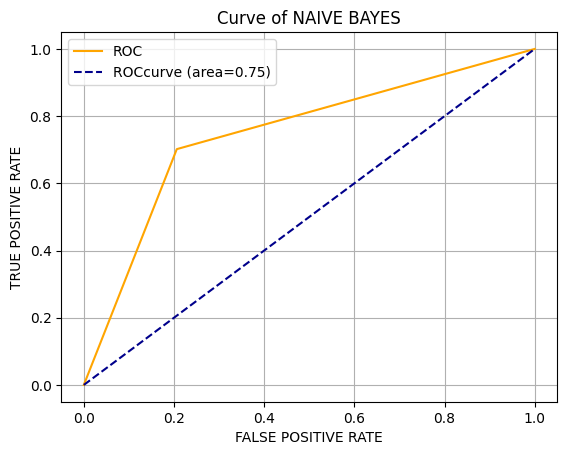

In [138]:
fpr,tpr,thresholds=roc_curve(y_test,nb_pred)
plt.plot(fpr,tpr,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='ROCcurve (area=%0.2f)'%auc)
plt.xlabel('FALSE POSITIVE RATE')
plt.ylabel('TRUE POSITIVE RATE')
plt.title('Curve of NAIVE BAYES')
plt.legend()
plt.grid()
plt.show()


<AxesSubplot:>

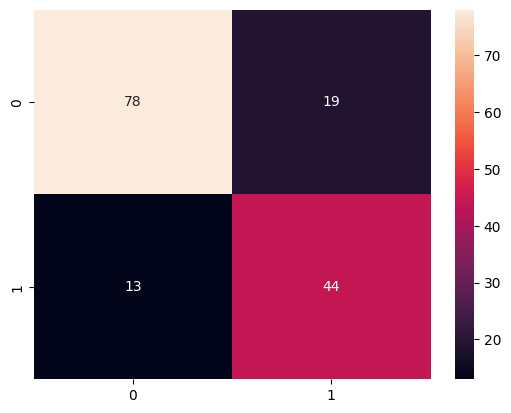

In [139]:
#DECISION TREE

sns.heatmap(confusion_matrix(y_test,dt_pred),annot=True,fmt="d")


In [140]:
from sklearn.metrics import recall_score
recall_score(y_test,dt_pred)*100


77.19298245614034

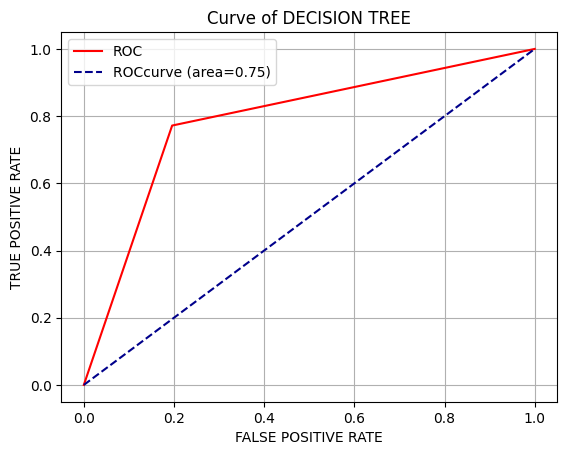

In [142]:
fpr,tpr,thresholds=roc_curve(y_test,dt_pred)
plt.plot(fpr,tpr,color='red',label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='ROCcurve (area=%0.2f)'%auc)
plt.xlabel('FALSE POSITIVE RATE')
plt.ylabel('TRUE POSITIVE RATE')
plt.title('Curve of DECISION TREE')
plt.legend()
plt.grid()
plt.show()


<AxesSubplot:>

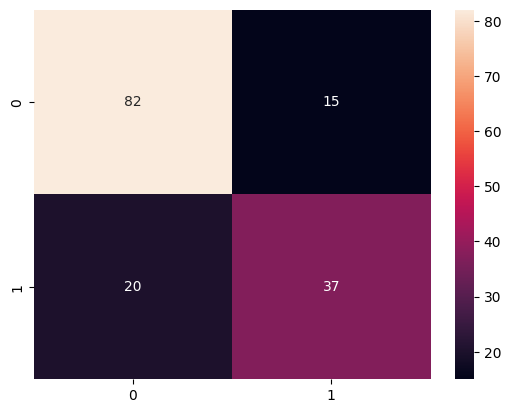

In [143]:
#RANDOM FOREST

sns.heatmap(confusion_matrix(y_test,rf_pred),annot=True,fmt="d")


In [144]:
from sklearn.metrics import recall_score
recall_score(y_test,rf_pred)*100


64.91228070175438

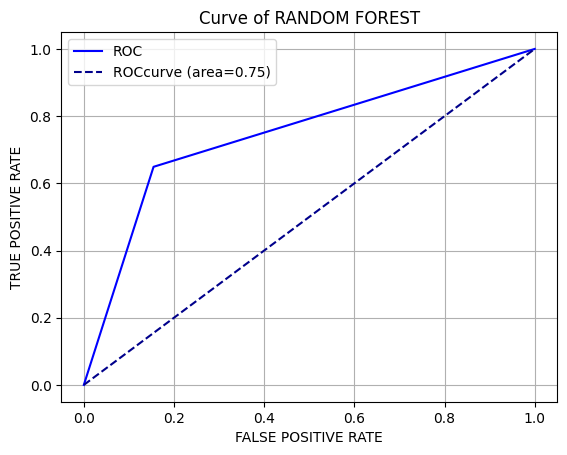

In [145]:
fpr,tpr,thresholds=roc_curve(y_test,rf_pred)
plt.plot(fpr,tpr,color='blue',label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='ROCcurve (area=%0.2f)'%auc)
plt.xlabel('FALSE POSITIVE RATE')
plt.ylabel('TRUE POSITIVE RATE')
plt.title('Curve of RANDOM FOREST')
plt.legend()
plt.grid()
plt.show()
